In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148.0,72,35.0,0.0,33.6,0.627,50.0
1,1,85.0,66,29.0,0.0,26.6,0.351,31.0
2,8,183.0,64,0.0,0.0,23.3,0.672,32.0
3,1,89.0,66,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63.0
764,2,122.0,70,27.0,0.0,36.8,0.340,27.0
765,5,121.0,72,23.0,112.0,26.2,0.245,30.0
766,1,126.0,60,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
int64		column 3	0
float64		column 4	3
float64		column 5	12
float64		column 6	9
float64		column 7	0
float64		column 8	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,765.000000,768.000000,765.000000,756.000000,759.000000,768.000000,747.000000
mean,3.845052,120.875817,69.105469,20.453595,79.513228,32.006983,0.471876,33.240964
std,3.369578,32.009308,19.355807,15.923722,115.494852,7.880559,0.331329,11.814281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.350000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.372500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

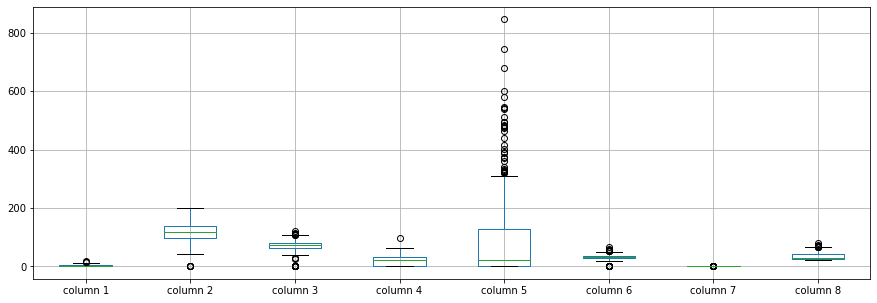

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.875817
column 3     69.105469
column 4     20.453595
column 5     79.513228
column 6     32.006983
column 7      0.471876
column 8     33.240964
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.130313,0.141282,-0.079025,-0.082674,0.018936,-0.033523,0.538655
column 2,0.130313,1.000000,0.151300,0.056754,0.337940,0.214379,0.137991,0.268870
column 3,0.141282,0.151300,1.000000,0.206559,0.094565,0.279533,0.041265,0.235590
column 4,-0.079025,0.056754,0.206559,1.000000,0.443939,0.385407,0.185745,-0.110761
column 5,-0.082674,0.337940,0.094565,0.443939,1.000000,0.193306,0.187049,-0.043284
column 6,0.018936,0.214379,0.279533,0.385407,0.193306,1.000000,0.147409,0.047290
column 7,-0.033523,0.137991,0.041265,0.185745,0.187049,0.147409,1.000000,0.032441
column 8,0.538655,0.268870,0.235590,-0.110761,-0.043284,0.047290,0.032441,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+12,8+12+12,8+12+12+12,8+12+12+12+12,8+12+12+12+12+12,8+12+12+12+12,8+12+12+12,8+12+12,8+12,8], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 424.93148040771484
Epoch: 1 , loss: 423.7347583770752
Epoch: 2 , loss: 423.35572179158527
Epoch: 3 , loss: 423.2967122395833
Epoch: 4 , loss: 423.20192527770996
Epoch: 5 , loss: 425.1738847096761
Epoch: 6 , loss: 421.0442460378011
Epoch: 7 , loss: 422.81173006693524
Epoch: 8 , loss: 423.6145184834798
Epoch: 9 , loss: 424.48709233601886
Epoch: 10 , loss: 420.76758766174316
Epoch: 11 , loss: 413.2817980448405
Epoch: 12 , loss: 406.6299343109131
Epoch: 13 , loss: 387.92303975423175
Epoch: 14 , loss: 365.9456615447998
Epoch: 15 , loss: 355.37709554036456
Epoch: 16 , loss: 344.92787679036456
Epoch: 17 , loss: 335.68224843343097
Epoch: 18 , loss: 335.73601150512695
Epoch: 19 , loss: 338.5870132446289
Epoch: 20 , loss: 331.29370307922363
Epoch: 21 , loss: 336.51231384277344
Epoch: 22 , loss: 332.6682602564494
Epoch: 23 , loss: 330.4887440999349
Epoch: 24 , loss: 334.15289243062335
Epoch: 25 , loss: 328.1525141

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0,0.0,0,0.0,0.0,0.0,0.0,0.0
764,0,0.0,0,0.0,0.0,0.0,0.0,0.0
765,0,0.0,0,0.0,0.0,0.0,0.0,0.0
766,0,0.0,0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(560.2749427742392, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.09699083308850588

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148.0,72,35.0,0.0,33.6,0.627,50.0
1,1,85.0,66,29.0,0.0,26.6,0.351,31.0
2,8,183.0,64,0.0,0.0,23.3,0.672,32.0
3,1,89.0,66,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63.0
764,2,122.0,70,27.0,0.0,36.8,0.340,27.0
765,5,121.0,72,23.0,112.0,26.2,0.245,30.0
766,1,126.0,60,0.0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_AW_1.xlsx", index=False, header=False)